In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

In [2]:
h5_file_path = 'datasets/combined_datasets.h5'
with h5py.File(h5_file_path, 'r') as h5file:
    # Load datasets
    material_names = np.array(h5file['material_names']).astype(str)
    alphas_array = h5file['alphas/cm^-1'][:]
    dae_lvs_array = h5file['dae_lvs'][:]     #9 dimensional latent vectors from DAE
    vae_lvs_array = h5file['vae_lvs'][:]     #9 dimensional latent vectors from VAE
    dae_reconstr_array = h5file['dae_reconstr'][:]     #reconstruction using from DAE
    vae_reconstr_array = h5file['vae_reconstr'][:]     #reconstruction using from VAE
    maxs_array = h5file['maxs'][:]              #maximum value
    positions_array = h5file['positions'][:]    #position of the maximum value
    nlm_array = h5file['n_local_maximums'][:]   #number of local maximum
    slopes_array = h5file['slopes'][:]          #slope from the first non-zero to the maximum value


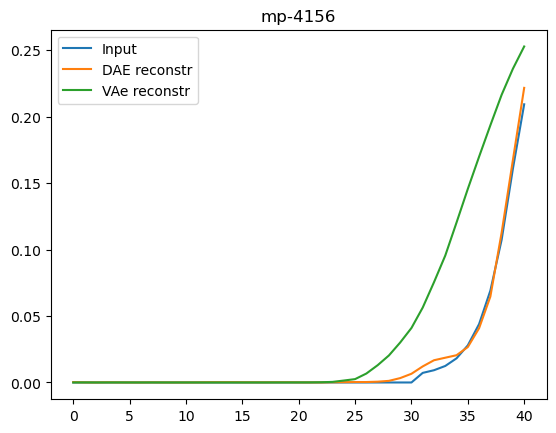

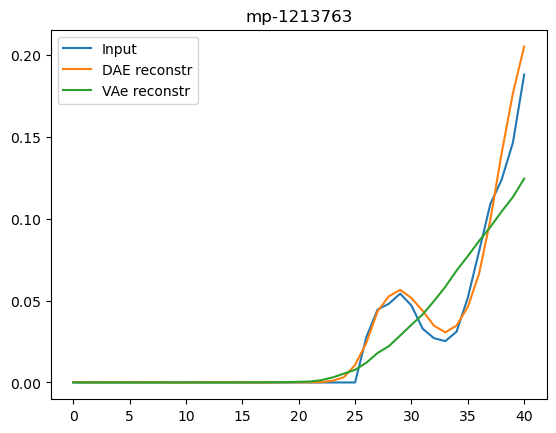

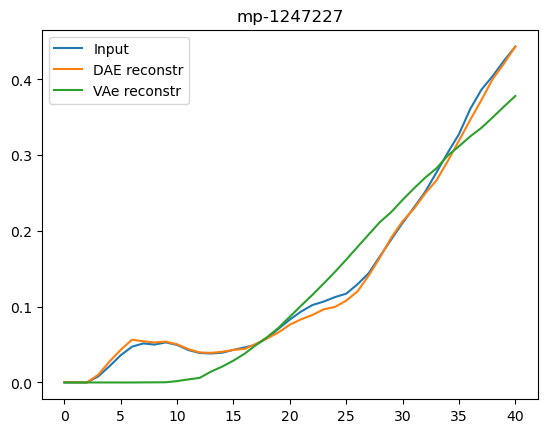

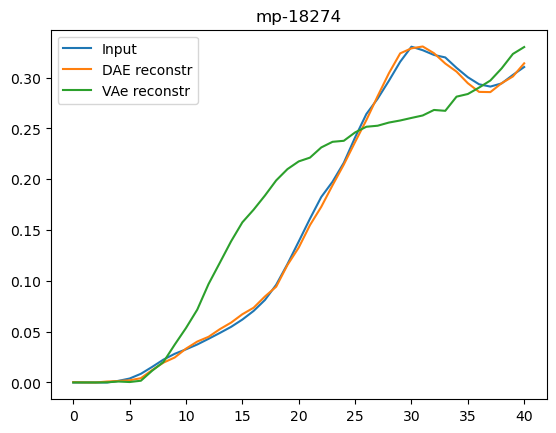

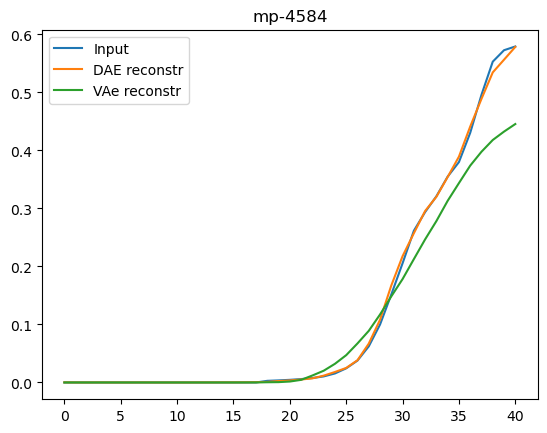

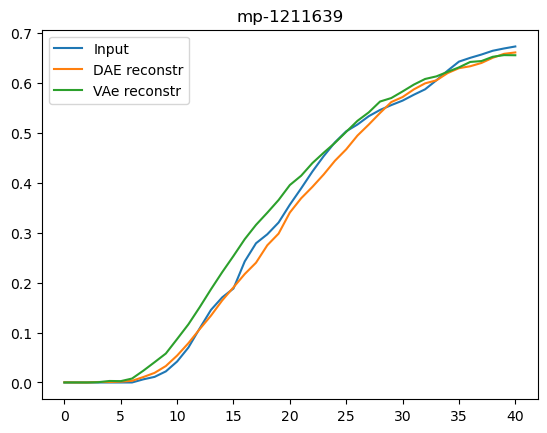

In [3]:
for idx in [24394, 7375,  6198,  3207,   58,   16123]:
    plt.figure()
    plt.plot(alphas_array[idx], label = 'Input')
    plt.plot(dae_reconstr_array[idx][0], label = 'DAE reconstr')
    plt.plot(vae_reconstr_array[idx][0], label = 'VAe reconstr')
    plt.legend()
    plt.title(material_names[idx])
    plt.savefig(f'{idx}.png')

In [4]:
dae_recon_error = np.mean((alphas_array - dae_reconstr_array[:, 0, :])**2)
vae_recon_error = np.mean((alphas_array - vae_reconstr_array[:, 0, :])**2)
                  
print(f'recon error:{dae_recon_error}')
print(f'recon error:{vae_recon_error}')

recon error:8.620951848570257e-05
recon error:0.001257863244973123


In [5]:
from scipy.spatial import distance

def observations_idx_from_factors(random_latent_vector, latent_vector_from_sample):
    diff = distance.cdist(latent_vector_from_sample, random_latent_vector)
    idxs = np.argmin(diff, axis = 0)
    return idxs

In [6]:
min_vals = np.min(dae_lvs_array, axis=0)
max_vals = np.max(dae_lvs_array, axis=0)

# Number of random samples to generate
num_samples = 1

# Generate random vectors within the range
random_vectors = np.random.uniform(min_vals, max_vals, size=(num_samples, dae_lvs_array.shape[1]))


In [7]:
idx = observations_idx_from_factors(random_vectors, dae_lvs_array)[0]

In [8]:
print('The cloeset material name: {}'.format(material_names[idx]))

The cloeset material name: mp-1029327


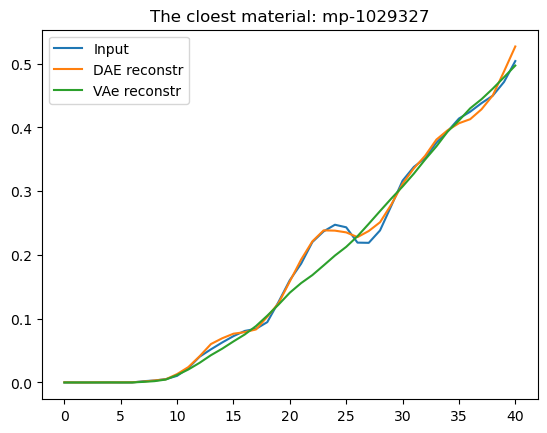

In [9]:
plt.figure()
plt.plot(alphas_array[idx], label = 'Input')
plt.plot(dae_reconstr_array[idx][0], label = 'DAE reconstr')
plt.plot(vae_reconstr_array[idx][0], label = 'VAe reconstr')
plt.legend()
plt.title('The cloest material: {}'.format(material_names[idx]))
plt.show()